# Exploratory data analysis of student surveys

## importing necessary libraries

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [312]:
df= pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)
df.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


### getting to know the data

In [313]:
df.shape

(1010, 15)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Music            1007 non-null   float64
 1   Techno           1003 non-null   float64
 2   Movies           1004 non-null   float64
 3   History          1008 non-null   float64
 4   Mathematics      1007 non-null   float64
 5   Pets             1006 non-null   float64
 6   Spiders          1005 non-null   float64
 7   Loneliness       1009 non-null   float64
 8   Parents' advice  1008 non-null   float64
 9   Internet usage   1010 non-null   object 
 10  Finances         1007 non-null   float64
 11  Age              1003 non-null   float64
 12  Siblings         1004 non-null   float64
 13  Gender           1004 non-null   object 
 14  Village - town   1006 non-null   object 
dtypes: float64(12), object(3)
memory usage: 126.2+ KB


In [315]:
df.describe()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Finances,Age,Siblings
count,1007.000000,1003.000000,1004.000000,1008.000000,1007.000000,1006.00000,1005.000000,1009.000000,1008.000000,1007.000000,1003.000000,1004.000000
mean,4.731877,2.338983,4.613546,3.207341,2.334657,3.33499,2.825871,2.887017,3.265873,3.023833,20.433699,1.297809
std,0.664049,1.324099,0.694700,1.263523,1.352496,1.54537,1.543695,1.131757,0.865736,1.144365,2.828840,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,5.000000,1.000000,4.000000,2.000000,1.000000,2.00000,1.000000,2.000000,3.000000,2.000000,19.000000,1.000000
50%,5.000000,2.000000,5.000000,3.000000,2.000000,4.00000,3.000000,3.000000,3.000000,3.000000,20.000000,1.000000
75%,5.000000,3.000000,5.000000,4.000000,3.000000,5.00000,4.000000,4.000000,4.000000,4.000000,22.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,30.000000,10.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

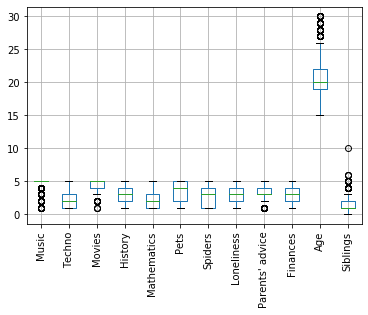

In [316]:
df.boxplot()
plt.xticks(rotation=90)

## cleaning the data

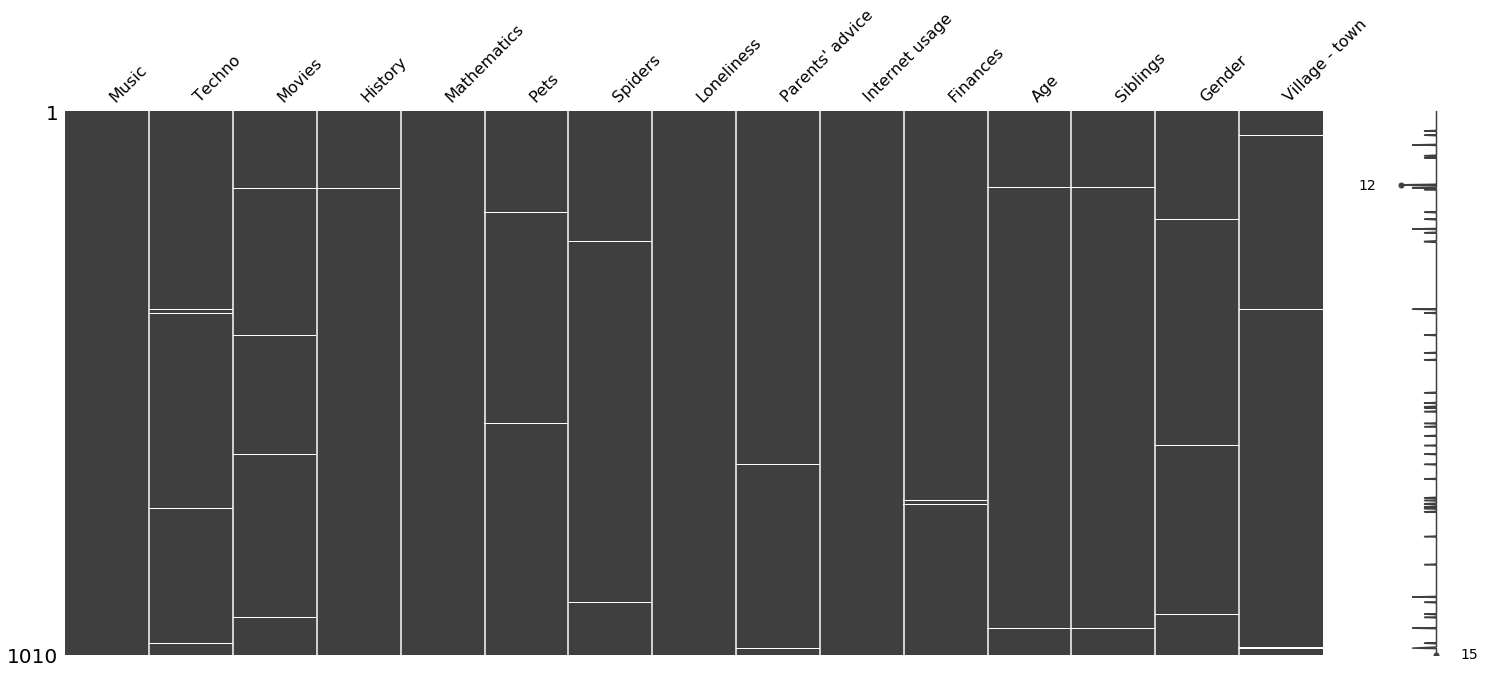

In [317]:
msno.matrix(df)

In [318]:
df.dropna(subset=['Gender','Village - town'], inplace=True)

In [319]:
null_col=list(df.columns[df.isna().any()])
null_col

['Music',
 'Techno',
 'Movies',
 'History',
 'Mathematics',
 'Pets',
 'Spiders',
 'Loneliness',
 "Parents' advice",
 'Finances',
 'Age',
 'Siblings']

In [320]:
for col in null_col:
    df[col]=df[col].fillna(df[col].median())

In [321]:
df.isna().sum()

Music              0
Techno             0
Movies             0
History            0
Mathematics        0
Pets               0
Spiders            0
Loneliness         0
Parents' advice    0
Internet usage     0
Finances           0
Age                0
Siblings           0
Gender             0
Village - town     0
dtype: int64

In [322]:
convert= list(df.columns)
for col in convert:
    if df[col].dtype =='float64':
        df[col]=df[col].astype('int32')
df.dtypes

Music               int32
Techno              int32
Movies              int32
History             int32
Mathematics         int32
Pets                int32
Spiders             int32
Loneliness          int32
Parents' advice     int32
Internet usage     object
Finances            int32
Age                 int32
Siblings            int32
Gender             object
Village - town     object
dtype: object

In [323]:
df.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5,1,5,1,3,4,1,3,4,few hours a day,3,20,1,female,village
1,4,1,5,1,5,5,1,2,2,few hours a day,3,19,2,female,city
2,5,1,5,1,5,5,1,5,3,few hours a day,2,20,2,female,city
3,5,2,5,4,4,1,5,5,2,most of the day,2,22,1,female,city
4,5,2,5,3,2,1,1,3,3,few hours a day,4,20,1,female,village


In [324]:
df[df.duplicated(keep=False)]

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
177,5,1,5,3,1,5,1,3,3,few hours a day,3,26,2,male,city
193,5,1,5,3,1,5,1,3,3,few hours a day,3,26,2,male,city


In [325]:
df=df.drop_duplicates(keep='first').reset_index()

# Task 1: Plot the relation between students with good parent advice and mathematics, also show whether they are from city or village

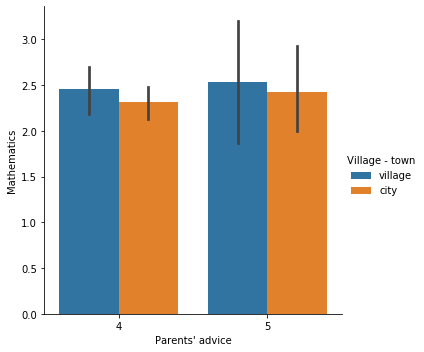

In [326]:
good_parent= df["Parents' advice"] >= 4
sns.catplot(x="Parents' advice", y="Mathematics",
            data=df[good_parent],
            kind="bar", hue="Village - town")

# Task 2: What is the relation between finances and parent advice

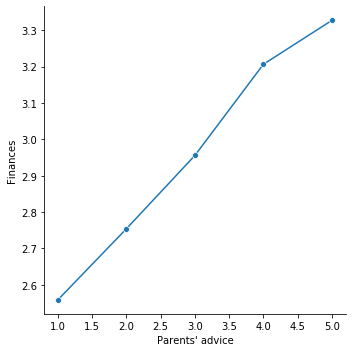

In [327]:
sns.relplot(x="Parents' advice", y='Finances', data=df, kind='line', ci=None, marker='o')

# Task 3: Who are better at literature, males or females

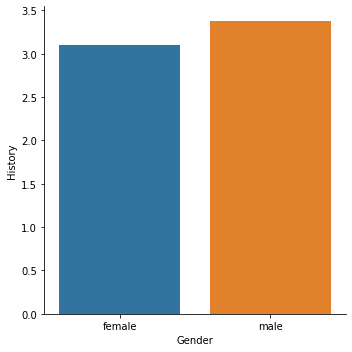

In [328]:
sns.catplot(x='Gender', y='History', data=df, kind="bar", ci=None)

# Task 4:  Infer relation between lonelines and high internet usage and subset for village or town

Text(0.5, 1, 'Loneliness in Village/City for internet users')

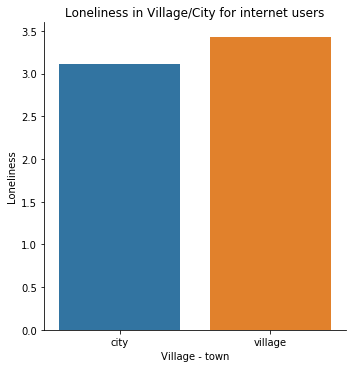

In [329]:
high_int=df['Internet usage'] == "most of the day" 
sns.catplot(x='Village - town', y='Loneliness', data=df[high_int], kind="bar", ci=None)
plt.title("Loneliness in Village/City for internet users")

# Task 5: Plot relation for- if they are interested in music, they'd be interested in music too

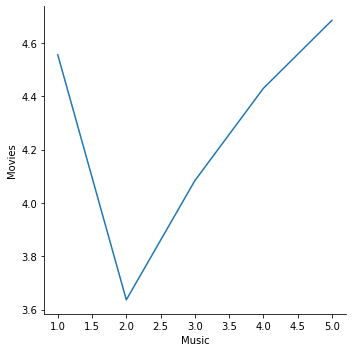

In [330]:
sns.relplot(x='Music', y='Movies', data=df, kind='line', ci=None)

#### not so direct relation untill score 2 in music

In [331]:
df.head(2)
df['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

# Task 6: Relation between finances and loneliness among low internet users

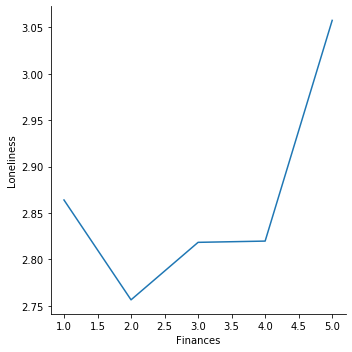

In [332]:
low_int= ~high_int
sns.relplot(x='Finances', y='Loneliness', data=df[low_int], kind="line", ci=None)

### Even with good finances there is high loneliness